# Practice Session 06: PageRank

# 1. Read host names

In [1]:
import io
import gzip
import csv
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
INPUT_NODES_FILENAME = "webspam_uk2007-nodes.csv.gz"
INPUT_EDGES_FILENAME = "webspam_uk2007-edges.csv.gz"

In [3]:
id2name={}
id2label = {}
name2id = {}

with gzip.open(INPUT_NODES_FILENAME, "rt", encoding="utf-8") as input_file:
    reader = csv.DictReader(input_file, delimiter=',', quotechar='"')
    for record in reader:
      key = int(record["nodeid"])
      key2 = record["hostname"]
      id2name[key] =  record["hostname"]
      name2id[key2] = int(record["nodeid"])
      id2label[key] = record["label"]
      

In [4]:
# Leave as-is

print("%s: %s" % (id2name[873], id2label[873]))
print("%s: %s" % (id2name[105715], id2label[105715]))
print("Number of hosts: %s" % len(id2name))

bbc.co.uk: nonspam
www.top-mobile-phones.co.uk: spam
Number of hosts: 114529


In [5]:
spam = 0
nonspam = 0
unlabeled = 0
for i in id2label:
  
  if id2label[i] == "spam":
    spam += 1
  elif id2label[i] == "nonspam":
    nonspam += 1
  elif id2label[i] == "unlabeled":
    unlabeled += 1
  
  
print(spam, nonspam, unlabeled )

344 5709 108476


In [6]:
spammywords = ['escort', 'xx', 'girl', 'credit', 'mortgage', 'finance', 'debt', 'loan']
g = nx.DiGraph()

with gzip.open(INPUT_EDGES_FILENAME, "rt", encoding="utf-8") as input_file:
    reader = csv.DictReader(input_file, delimiter=',', quotechar='"')
    for record in reader:
      source =  int(record["source"])
      destination = int(record["destination"])

      #Todas las condiciones necesarias
      if (id2label[int(source)] == "spam" or id2label[int(source)] == "nonspam") and (id2label[int(destination)] == "spam" or id2label[int(destination)] == "nonspam"):
          for word in spammywords:

            #Revisa si hay alguna 'spammyword' en alguno de los 2 nodos
            if ( word in id2name[int(source)]) or ( word in id2name[int(destination)]):
                  g.add_node(id2name[source])
                  g.add_node(id2name[destination])
                  g.add_edge(id2name[source], id2name[destination])
        



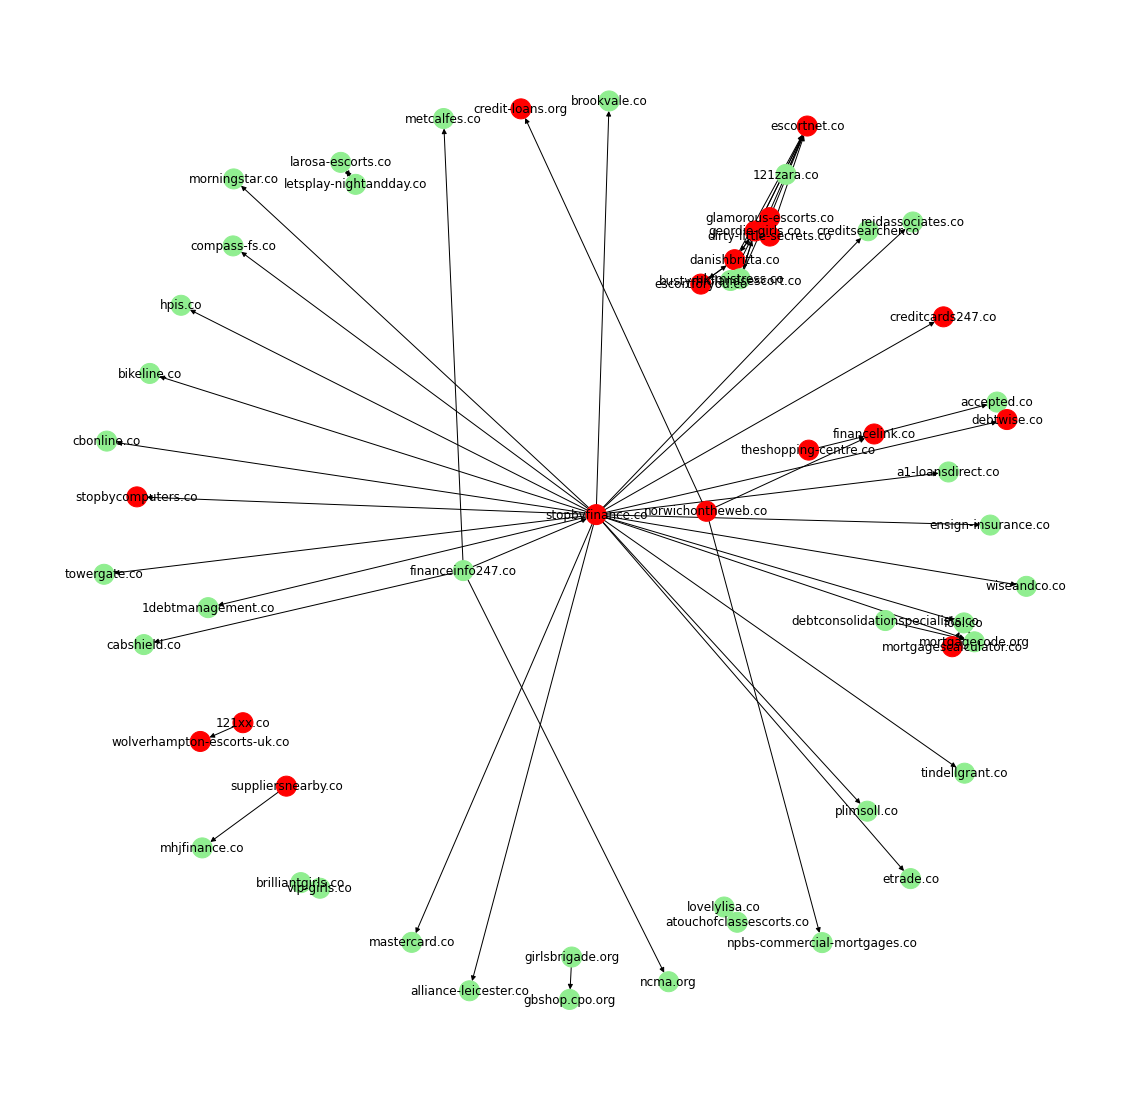

In [7]:
# Leave this code as-is, or modify slightly

colors = []
hostname_converted = {}

for hostname in g.nodes():
    # Assign colors to nodes according to spam/nonspam labels
    if id2label[name2id[hostname]] == 'spam':
        colors.append('red')
    elif id2label[name2id[hostname]] == 'nonspam':
        colors.append('lightgreen')
    else:
        colors.append('white')
    
    # Shorten the hostnames to generate labels    
    label = hostname.replace("www.", "").replace(".uk", "")
    hostname_converted[hostname] = label
    
# Notice that if you re-run this cell the layout will be different every time
plt.figure(figsize=(20, 20))
plt.axis('off')
pos = nx.spring_layout(g)
nx.draw_networkx(g, pos, with_labels=True, node_size=400, node_color=colors, labels=hostname_converted)

<font size="+1" color="red">Replace this cell with a brief commentary on what you see in the plot above.</font>

Se observa un grafo con 57 nodos. Aquellos que están de color verde están catalogados como 'nonspam' mientras que los rojos como 'spam'. Observamos como hay dos nodos o páginas  en el centro que dirigen practicamente a todos los demás nodos(stopbyfinance.co y norwichontheweb.co). Pese a que la mayoría de nodos son 'nonspam', el grafo se ha creado de manera que trata de incluir aquellas páginas que tienen palabras consideradas 'spammy', es decir, que es probable que sean 'spam'.

# 2. Compute the degree of each node

In [8]:
# Leave this code as-is

id2degree = {}
N = len(id2name)
for nodeid in range(N):
    id2degree[nodeid] = 0

In [9]:
with gzip.open(INPUT_EDGES_FILENAME, "rt", encoding="utf-8") as input_file:
    reader = csv.DictReader(input_file, delimiter=',', quotechar='"')
    for record in reader:
      
      # Cada vez que aparezca el mismo source, es que se le está añadiendo otro nodo de salida y por lo tanto, su grado augmenta +1
      source = int(record["source"])
      id2degree[source] += 1

In [10]:
# Leave this cell as-is

for nodeid in [890, 1469, 105715]:
    print("%s: degree %d" % (id2name[nodeid], id2degree[nodeid]))

bc1.org.uk: degree 16
candycaine.skinthesun.co.uk: degree 22
www.top-mobile-phones.co.uk: degree 0


# 3. Compute PageRank

In [11]:
ITERATIONS = 20
ALPHA = 0.85

pagerank_aux = [0.0] * N
pagerank = [1.0/N] * N

for iteration in range(ITERATIONS): #Iteraciones que se quieran computar
    print("Iteration %d of %d" % (iteration+1, ITERATIONS))
    with gzip.open(INPUT_EDGES_FILENAME, "rt", encoding="utf-8") as input_file:
      #Se lee el fichero
      reader = csv.DictReader(input_file, delimiter=',', quotechar='"')
      for record in reader: 
        #Fórmula para PageRank auxiliar(se aplica para cada nodo)
        pagerank_aux[int(record["destination"])] += pagerank[int(record["source"])]/id2degree[int(record["source"])]
        
    #Calcular PageRank para cada nodo a partir de pagerank_aux calculado anteriorente, alpha y N
    for i in range(N):
      pagerank[i] = ALPHA*pagerank_aux[i] + (1-ALPHA)*(1/N)

      #reestablecemo el auxiliar a 0 para que se pueda utilizar en la siguiete iteracion
      pagerank_aux[i] = 0




Iteration 1 of 20
Iteration 2 of 20
Iteration 3 of 20
Iteration 4 of 20
Iteration 5 of 20
Iteration 6 of 20
Iteration 7 of 20
Iteration 8 of 20
Iteration 9 of 20
Iteration 10 of 20
Iteration 11 of 20
Iteration 12 of 20
Iteration 13 of 20
Iteration 14 of 20
Iteration 15 of 20
Iteration 16 of 20
Iteration 17 of 20
Iteration 18 of 20
Iteration 19 of 20
Iteration 20 of 20


# 4. Nodes with largest values of PageRank

In [12]:
#Ordena pagerank en orden descendiente
ordered = sorted(enumerate(pagerank), key=lambda x: x[1], reverse=True)
a = 0
for i in ordered:
  #Solo print los 20 primeros
  if a<20:
    #ID
    id = i[0];

    #Nombre
    name = id2name[id]

    #Etiqueta
    label = id2label[id]

    #Puntuación
    score = i[1]
    print("ID: %d" % id)
    print("Name: %s" % name)
    print("Label: %s" % label)
    print("Score: %f" % round(score,6))
    print("\n")
    a += 1

ID: 81634
Name: www.opsi.gov.uk
Label: unlabeled
Score: 0.001517


ID: 10990
Name: www.adobe.co.uk
Label: unlabeled
Score: 0.001418


ID: 60715
Name: www.ico.gov.uk
Label: unlabeled
Score: 0.000965


ID: 42757
Name: www.dti.gov.uk
Label: unlabeled
Score: 0.000896


ID: 39774
Name: www.defra.gov.uk
Label: unlabeled
Score: 0.000894


ID: 5169
Name: news.bbc.co.uk
Label: unlabeled
Score: 0.000780


ID: 40999
Name: www.direct.gov.uk
Label: unlabeled
Score: 0.000721


ID: 40559
Name: www.dfes.gov.uk
Label: unlabeled
Score: 0.000698


ID: 51107
Name: www.fsa.gov.uk
Label: unlabeled
Score: 0.000682


ID: 77619
Name: www.nationalrail.co.uk
Label: unlabeled
Score: 0.000658


ID: 34406
Name: www.communities.gov.uk
Label: unlabeled
Score: 0.000655


ID: 19504
Name: www.bbc.co.uk
Label: unlabeled
Score: 0.000648


ID: 54071
Name: www.google.co.uk
Label: unlabeled
Score: 0.000603


ID: 40612
Name: www.dh.gov.uk
Label: unlabeled
Score: 0.000591


ID: 58631
Name: www.hmso.gov.uk
Label: unlabeled
Scor


Observamos que la página con mayor puntuación en el algoritmo de PageRank es una llamada opsi.gov por lo que sabemos que es una página gubernamental. En cierto punto es lógico ya que 
podemos considerar una página del gobierno importante y fiable, es decir que será una nodo importante en la red(al que pueden apuntar muchos otros nodos de ésta).

Observando los datos, encontramos que un 65% de las páginas con mayor puntuación en PageRank son gubernamentales. A estas, le siguen un 15% que se atribuyen a páginas comerciales. Hay un 15% de páginas de diarios como la bbc o motores de búsqueda (Google). Por último hay un tipo de páginas que se pueden catalogar como organizaciones (nationaltrust.org) que supone un 5%.


# 5. Run non-spam PageRank

In [13]:
id2nsdegree = {}
N = 0

N = len(id2name)
for nodeid in range(N):
    id2nsdegree[nodeid] = 0


with gzip.open(INPUT_EDGES_FILENAME, "rt", encoding="utf-8") as input_file:
    reader = csv.DictReader(input_file, delimiter=',', quotechar='"')
    for record in reader:
      #Condición de que ni source ni destination sean spam es necesaria para que sume el grado
      if id2label[int(record["source"])] != "spam" and id2label[int(record["destination"])] != "spam":
        id2nsdegree[int(record["source"])] += 1

In [14]:
# Leave this cell as-is

for nodeid in [890, 1469, 105715]:
     print("%s: normal degree %d nospam degree %d" % (id2name[nodeid], id2degree[nodeid], id2nsdegree[nodeid]))


bc1.org.uk: normal degree 16 nospam degree 16
candycaine.skinthesun.co.uk: normal degree 22 nospam degree 20
www.top-mobile-phones.co.uk: normal degree 0 nospam degree 0


In [15]:
#Inicializa nspagerank
nspagerank_aux = [0.0] * N
nspagerank = [1.0/N] * N

for iteration in range(ITERATIONS):
    print("Iteration %d of %d" % (iteration+1, ITERATIONS))
    with gzip.open(INPUT_EDGES_FILENAME, "rt", encoding="utf-8") as input_file:
      reader = csv.DictReader(input_file, delimiter=',', quotechar='"')

      for record in reader:
        #Igual que pagerank pero cumpliendo la condición de que ni source ni destination sean spam 
        if id2label[int(record["source"])] != 'spam' and id2label[int(record["destination"])] != 'spam':
          #Calcula auxiliar únicamente a los nodos que cumplan las condiciones
          nspagerank_aux[int(record["destination"])] += nspagerank[int(record["source"])]/id2nsdegree[int(record["source"])]
    #Calcula nspagerank para todos los nodos, a partir del auxiliar, alpha y N
    for i in range(N):
      nspagerank[i] = ALPHA*nspagerank_aux[i] + (1-ALPHA)*(1/N)
      #reestablecemo el auxiliar a 0 para que se pueda utilizar en la siguiete iteracion
      nspagerank_aux[i] = 0




Iteration 1 of 20
Iteration 2 of 20
Iteration 3 of 20
Iteration 4 of 20
Iteration 5 of 20
Iteration 6 of 20
Iteration 7 of 20
Iteration 8 of 20
Iteration 9 of 20
Iteration 10 of 20
Iteration 11 of 20
Iteration 12 of 20
Iteration 13 of 20
Iteration 14 of 20
Iteration 15 of 20
Iteration 16 of 20
Iteration 17 of 20
Iteration 18 of 20
Iteration 19 of 20
Iteration 20 of 20


In [16]:
#Ordena nspagerank descendentemente
ordered = sorted(enumerate(nspagerank), key=lambda x: x[1], reverse=True)
a = 0
for i in ordered:
  if a<20:
    #ID
    id = i[0]

    #Nombre
    name = id2name[id]

    #Etiqueta
    label = id2label[id]

    #Puntuacion
    score = i[1]

    
    print("ID: %d" % id)
    print("Name: %s" % name)
    print("Label: %s" % label)
    print("Score: %f" % round(score,6))
    print("\n")
    a += 1

ID: 81634
Name: www.opsi.gov.uk
Label: unlabeled
Score: 0.001516


ID: 10990
Name: www.adobe.co.uk
Label: unlabeled
Score: 0.001418


ID: 60715
Name: www.ico.gov.uk
Label: unlabeled
Score: 0.000964


ID: 42757
Name: www.dti.gov.uk
Label: unlabeled
Score: 0.000895


ID: 39774
Name: www.defra.gov.uk
Label: unlabeled
Score: 0.000893


ID: 5169
Name: news.bbc.co.uk
Label: unlabeled
Score: 0.000780


ID: 40999
Name: www.direct.gov.uk
Label: unlabeled
Score: 0.000720


ID: 40559
Name: www.dfes.gov.uk
Label: unlabeled
Score: 0.000698


ID: 51107
Name: www.fsa.gov.uk
Label: unlabeled
Score: 0.000680


ID: 77619
Name: www.nationalrail.co.uk
Label: unlabeled
Score: 0.000657


ID: 34406
Name: www.communities.gov.uk
Label: unlabeled
Score: 0.000655


ID: 19504
Name: www.bbc.co.uk
Label: unlabeled
Score: 0.000648


ID: 54071
Name: www.google.co.uk
Label: unlabeled
Score: 0.000602


ID: 40612
Name: www.dh.gov.uk
Label: unlabeled
Score: 0.000591


ID: 58631
Name: www.hmso.gov.uk
Label: unlabeled
Scor

# 6. Compute spam gain

In [17]:
#Inicializo gain
gain =[0.0]*N


with gzip.open(INPUT_NODES_FILENAME, "rt", encoding="utf-8") as input_file:
      reader = csv.DictReader(input_file, delimiter=',', quotechar='"')
      for record in reader:
        #Calculo gain de cada nodo
        gain[int(record["nodeid"])] = pagerank[int(record["nodeid"])]/nspagerank[int(record["nodeid"])]

#Ordena gain de manera descendente
orderedgain = sorted(enumerate(gain), key=lambda x: x[1], reverse=True)
j = 0
for i in orderedgain:
  #Solo print los 50 primeros
  if j<50:
    id = i[0];
    name = id2name[id]
    label = id2label[id]
    gain = i[1]
    print("Name: %s" % name)
    print("Label: %s" % label)
    print("Gain: ", round(gain,2))
    print("Normal PR: ", "{:.1e}".format(float(pagerank[id])) )      
    print("NS PR: ", "{:.1e}".format(float(nspagerank[id]))) 
    print("\n")
    j += 1


Name: www.escortnet.co.uk
Label: spam
Gain:  33.14
Normal PR:  4.3e-05
NS PR:  1.3e-06


Name: www.missionfish.org.uk
Label: spam
Gain:  29.06
Normal PR:  3.8e-05
NS PR:  1.3e-06


Name: www.statistics.006.free-counter.co.uk
Label: spam
Gain:  17.9
Normal PR:  2.3e-05
NS PR:  1.3e-06


Name: www.uk-shoponline.co.uk
Label: spam
Gain:  13.64
Normal PR:  1.8e-05
NS PR:  1.3e-06


Name: www.shop.co.uk
Label: spam
Gain:  10.8
Normal PR:  1.4e-05
NS PR:  1.3e-06


Name: www.geordie-girls.co.uk
Label: spam
Gain:  10.42
Normal PR:  1.4e-05
NS PR:  1.3e-06


Name: www.into.demon.co.uk
Label: spam
Gain:  10.35
Normal PR:  1.4e-05
NS PR:  1.3e-06


Name: www.computerarts.co.uk
Label: spam
Gain:  10.07
Normal PR:  1.3e-05
NS PR:  1.3e-06


Name: www.aili.co.uk
Label: unlabeled
Gain:  9.32
Normal PR:  1.3e-05
NS PR:  1.4e-06


Name: connect4fun.co.uk
Label: spam
Gain:  8.87
Normal PR:  1.2e-05
NS PR:  1.3e-06


Name: www.kompass.co.uk
Label: spam
Gain:  8.45
Normal PR:  1.1e-05
NS PR:  1.3e-06


Na


Se puede observar que la mayoría de webs son spam( a excepción de 2 que son 'unlabeled'). Entre estas páginas, lo más común es encontrar webs relacionadas a contenido pornográfico o adulto y webs relacionadas con el comercio o ventas online.

Muchos tienen la misma puntuación de NS-Pagerank ya que al hacer el cómputo de dichos valores, las páginas catalogadas como spam(o aquellas que apuntan a las que son spam) no se actualizan(nspagerankaux siempre será 0 para webs de spam o que sólamente estén apuntadas por spam) y por lo tanto mantienen todas la misma puntuación((1-ALPHA)/N).

<font size="+2" color="blue">Additional results: spam/nonspam visualization</font>

In [18]:
import pandas as pd


In [19]:
#Crea la lista con los 400 nodos con mayor puntuación en PageRank siempre que no estén catalogados como 'unlabeled'

g_list = []
a = 0
#Ordena pagerank
ordered = sorted(enumerate(pagerank), key=lambda x: x[1], reverse=True)
for i in ordered:
  #Itera mientras no pasemos los 400 nodos que no sean unlabeled
  if a<400 and id2label[i[0]] != 'unlabeled':
    #Añade a la lista los 400 primeros en ordered
    g_list.append(i[0])
    a+= 1




In [20]:
#Creo dos diccionarios: uno para almacenar las destinaciones de un nodo(una lista de destinaciones) y otro para almacenar los pesos de cada enlace
#para crear posteriormente el dataframe

source2dest = {}
source_dest2weight = {}
i = 0
with gzip.open(INPUT_EDGES_FILENAME, "rt", encoding="utf-8") as input_file:
      reader = csv.DictReader(input_file, delimiter=',', quotechar='"')
     
      for record in reader:
        key = int(record["source"])
        key2 = (int(record["source"]), int(record["destination"]))
        #Si es una clave nueva, se añade al diccionario con su destino
        if key not in source2dest:
          source2dest[key] = [int(record["destination"])]

        #Si es una clave ya existente en el diccionario, añadimos la destinación a la lista
        else:
          source2dest[key].append(int(record["destination"]))

        #Añade al segundo diccionario los pesos de cada enlace
        source_dest2weight[key2] = int(record["weight"])
   

In [21]:
#Crea el grafo dirigido de toda la red
g2 = nx.DiGraph()

with gzip.open(INPUT_EDGES_FILENAME, "rt", encoding="utf-8") as input_file:
      reader = csv.DictReader(input_file, delimiter=',', quotechar='"')
      for record in reader:
        source = int(record["source"])
        destination = int(record["destination"])

        #Añadir nodos siempre que no se hayan añadido ya
        if source not in g2.nodes():
          g2.add_node(source)
        if destination not in g2.nodes():
          g2.add_node(destination)
          
        #Añade todos los enlaces
        g2.add_edge(source, destination)
        

In [25]:
#Se crea un subgrafo de la red con los nodos seleccionados en g_list
subgraph = g2.subgraph(g_list)


In [26]:
#Se crean 2 dataframes para guardar por un lado los datos de los enlaces y por otro, los atributos de los nodos.


nodetable = {'idx':[],
        'Node':  [],
        'Source_pr':[],
        'Label' : []
        }
        
edgetable = {'Source':[],
             'Dest':[],
             'Weight' : []
             }

node_table = pd.DataFrame(nodetable)
edge_table = pd.DataFrame(edgetable)

#Para cada elemento en el subgrafo, se añade tanto el ID, el nombre, la etiqueta y la puntuación pagerank al dataframe de nodos
for hostid in subgraph.nodes():
    node = id2name[hostid]
    node_table = node_table.append({
        'idx' : hostid,
        'Node': node,
        'Source_pr' : round(pagerank[int(hostid)],6),
        'Label': id2label[int(hostid)]
    }, ignore_index = True)

    #Si el nodo enlaza hacia otro nodo de destino(ya sea hacia uno solo o más), se añaden todos los destinos a los que enlaza a la tabla de edges.
    if hostid in source2dest:
      for destination in source2dest[hostid]:
        if destination in subgraph.nodes() :
          edge_table = edge_table.append({'Source' : id2name[hostid],
                            'Dest' : id2name[destination],
                            'Weight' : source_dest2weight[(int(hostid), destination)]
                            },ignore_index= True)

    
      
      



In [24]:
#Con este código se puede importar las 2 tablas a ficheros csv en Google Drive
from google.colab import  drive
drive.mount('/drive')

node_table.to_csv('/drive/My Drive/ICX_graphs/webgraph_uk_nodes.csv', columns=['idx', 'Node', "Source_pr", "Label"])

edge_table.to_csv('/drive/My Drive/ICX_graphs/webgraph_uk_edges.csv', columns=['Source', "Dest", "Weight"])


Mounted at /drive


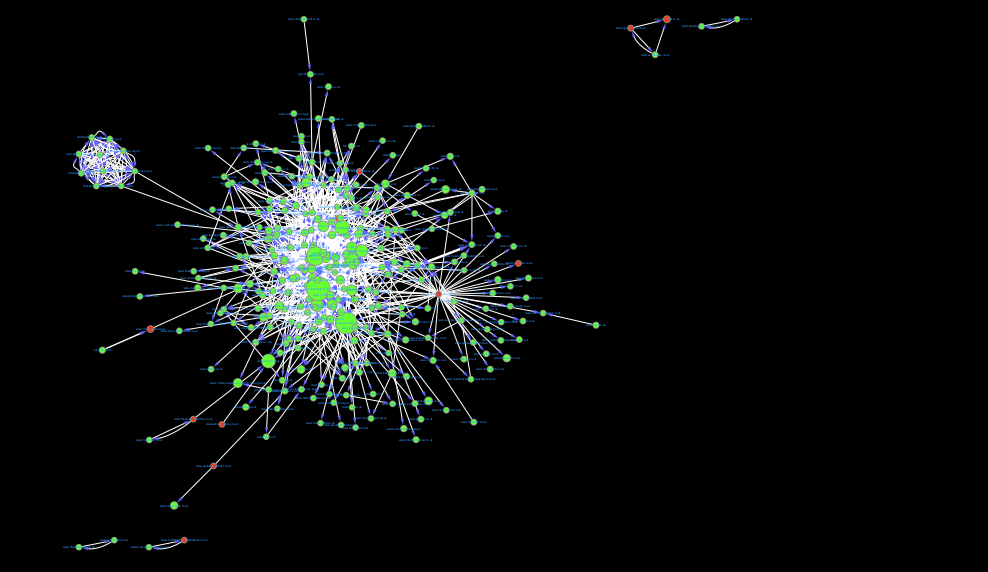

El gráfico adjuntado se trata de una red con los 400 nodos con mayor puntuación en el algoritmo PageRank. Los nodos en verde son aquellos catalogados como 'nonspam' mientras los rojos como 'spam'. El tamaño de los nodos está en función de su puntuaje en PageRank siendo los nodos más grandes los que obtuvieron mayor puntuación. Además, el grosor de las flechas está sujeto al peso o 'weight' del enlace. 

<font size="+2" color="#003300">I hereby declare that, except for the code provided by the course instructors, all of my code, report, and figures were produced by myself.</font>